#                                               JNIRS CT

#### In this note book we will train a  model to predict the certain features in protien grains

In [1]:
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import nippy
import peakutils
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
specs1 = pd.read_csv(r'D:\Gradution project\datasets\CGL\x_train.csv')
specs2 = pd.read_csv(r'D:\Gradution project\datasets\CGL\x_val.csv')
specs3 = pd.read_csv(r'D:\Gradution project\datasets\CGL\x_test.csv')
target1 = pd.read_csv(r'D:\Gradution project\datasets\CGL\y_train.csv')
target2 = pd.read_csv(r'D:\Gradution project\datasets\CGL\y_val.csv')
target3 = pd.read_csv(r'D:\Gradution project\datasets\CGL\y_test.csv')
X = pd.concat([specs1,specs2,specs3], axis=0)
y = pd.concat([target1,target2,target3], axis=0)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Text(0, 0.5, 'absorbtion')

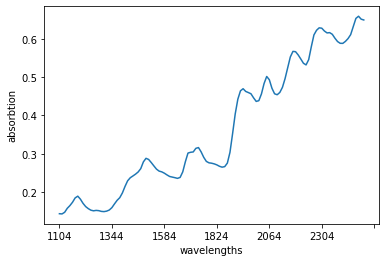

In [4]:
X.iloc[0].plot()
plt.xlabel('wavelengths')
plt.ylabel('absorbtion')

In [5]:
X.describe()

,1104,1116,1128,1140,1152,1164,1176,1188,1200,1212,...,2388,2400,2412,2424,2436,2448,2460,2472,2484,2496
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,...,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,0.149996,0.147944,0.148854,0.153572,0.158067,0.165654,0.173914,0.177523,0.173288,0.169520,...,0.543466,0.547416,0.560574,0.579057,0.601565,0.628049,0.659186,0.672735,0.669360,0.668493
std,0.007185,0.006349,0.005527,0.006060,0.007415,0.008798,0.011680,0.015175,0.014917,0.014225,...,0.063907,0.060956,0.063533,0.066476,0.070495,0.079041,0.096873,0.101072,0.098495,0.101787
min,0.140920,0.139660,0.140900,0.143490,0.145380,0.150570,0.153640,0.150860,0.147980,0.147450,...,0.417450,0.428190,0.439020,0.456490,0.477120,0.490600,0.494450,0.504640,0.507670,0.500560
25%,0.144638,0.143122,0.144930,0.148075,0.151365,0.157755,0.163725,0.165130,0.161125,0.159000,...,0.492790,0.499205,0.511540,0.528613,0.547828,0.569220,0.588020,0.599175,0.597538,0.594855
50%,0.148080,0.146260,0.147640,0.152830,0.157450,0.164900,0.172970,0.176150,0.171620,0.167220,...,0.545230,0.548850,0.559610,0.576680,0.596070,0.619310,0.646790,0.658810,0.654000,0.652450
75%,0.153403,0.150828,0.151618,0.157510,0.163540,0.172220,0.182773,0.188485,0.183138,0.177500,...,0.587955,0.589475,0.600272,0.619468,0.641253,0.671885,0.711413,0.729880,0.723707,0.725108
max,0.177840,0.172730,0.169600,0.171600,0.178260,0.189610,0.205310,0.220920,0.219220,0.218360,...,0.708130,0.706050,0.735270,0.772670,0.816860,0.873110,0.967670,0.998290,0.987920,0.997300


In [6]:
y.describe()

,ceasian,glucose,lactate,moisture
count,462.000000,462.000000,462.000000,462.000000
mean,29.611126,30.499134,25.235931,12.696667
std,22.469315,23.145781,19.151273,4.454427
min,0.000000,0.000000,0.000000,5.300000
25%,8.900000,9.162500,7.580000,9.102500
50%,26.650000,27.450000,22.710000,11.970000
75%,44.420000,45.747500,37.850000,15.862500
max,88.830000,91.500000,75.710000,24.290000


In [7]:
pls = PLSRegression(n_components=28)
pls.fit(X_train , y_train)

PLSRegression(n_components=28)

In [8]:
preds = pls.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
R_squared = pls.score(X_test,y_test)

print("RMSE: %f" % (rmse))
print("R^2: %f" % (R_squared))

RMSE: 0.260264
R^2: 0.999814


# JNIRS

In [50]:
def PolyCoefficients(values, coeffs):
    """ Returns a polynomial for ``x`` values for the ``coeffs`` provided.

    The coefficients must be in ascending order (``x**0`` to ``x**o``).
    """
    o = len(coeffs)
    y = np.zeros(values)
    x = np.array(range(values))
    
    for i in range(o):
        y = y + coeffs[i]*x**i
        
    return y

In [51]:
def addnoise(dataframe,noise_standardDeviation,noise_coeff,baseline_coeff):
    specs = dataframe
    columns = list(specs.columns)
    specs = specs.to_numpy()
    noise_poly = PolyCoefficients(specs.shape[1], noise_coeff)
    baseline = PolyCoefficients(specs.shape[1], baseline_coeff)
    
    for i in range(specs.shape[0]):
        specs[i] = specs[i] + (np.random.normal(0, noise_standardDeviation, specs.shape[1])*noise_poly)
        specs[i] = specs[i] + baseline
    
    
    specs = pd.DataFrame(specs,columns=columns)
    return specs  

In [52]:
def addnoise2(df,snr):
    
    temp = df.copy()      #make a separate df copy
    columns = list(temp.columns)     #save columns for restoration
    temp = temp.to_numpy()      #convert to numpy
    for idx,signal in enumerate(temp):
        
        #calculate average signal power
        sigpower=sum([math.pow(abs(signal[i]),2) for i in range(len(signal))])
        sigpower=sigpower/len(signal)
        
        #calculate noise power using signal to noise ratio
        noisepower=sigpower/(math.pow(10,snr/10))
        noise=math.sqrt(noisepower)*(np.random.uniform(-1,1,size=len(signal)))
        
        #add noise to origonal signal
        signal = signal + noise
        temp[idx] = signal
        
    temp = pd.DataFrame(temp,columns=columns)
    return temp

In [9]:
def addnoise3(df,snr):
    specs = df.copy()
    columns = list(specs.columns)
    specs = specs.to_numpy()
    noise_standardDeviation = 1/math.pow(10,(snr/10))
    for i in range(specs.shape[0]):
        specs[i] = specs[i] + np.random.normal(0, noise_standardDeviation, specs.shape[1])
        
    specs = pd.DataFrame(specs,columns=columns)
    return specs    

Split our data in half , to be half master then apply some noise on second half to be slave

In [10]:
X1 = X[:231]
y1 = y[:231]
X2 = X[231:]
y2 = y[231:]
master = X1.copy(deep=True)

add noise to second half to be slave, then test how the model would perform with the slave

<AxesSubplot:>

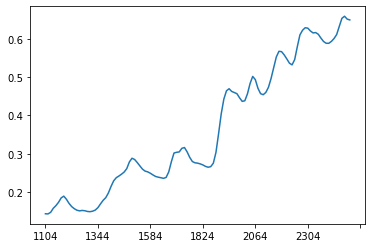

In [23]:
slave = addnoise3(X2.copy(deep=True),40)
slave.iloc[0].plot()

In [24]:
preds = pls.predict(slave)
rmse = np.sqrt(mean_squared_error(y2, preds))
R_squared = pls.score(slave,y2)

print("RMSE: %f" % (rmse))
print("R^2: %f" % (R_squared))

RMSE: 1.471567
R^2: 0.992773


## implementing the correction model 

In [14]:
delta_y = y2[:200].to_numpy()-preds[:200] 
delta_y.shape

(200, 4)

In [15]:
term1 = np.matmul(master.to_numpy().T , master.to_numpy())
delta_x  = slave[:200].to_numpy() -  np.matmul(slave[:200].to_numpy() , term1) 
delta_x.shape

(200, 117)

In [16]:
pls2 = PLSRegression(n_components=70)
pls2.fit(delta_x , delta_y)

PLSRegression(n_components=70)

In [17]:
term2 = np.matmul(slave[200:],(np.identity(term1.shape[0]) - term1))

In [18]:
new_preds = pls.predict(slave[200:]) + pls2.predict(term2)
new_preds.shape

C:\Users\Mahmoud\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but PLSRegression was fitted without feature names
  warnings.warn(


(31, 4)

In [19]:
rmse = np.sqrt(mean_squared_error(y2[200:], new_preds))

print("RMSE: %f" % (rmse))

RMSE: 5.609814


In [20]:
SNRs = [i for i in np.arange(10,80,0.5)]

In [21]:
RMSE = []
for snr in SNRs:
    slave = addnoise3(X2.copy(deep=True),snr)
    preds = pls.predict(slave)
    delta_y = y2[:200].to_numpy()-preds[:200]
    term1 = np.matmul(master.to_numpy().T , master.to_numpy())
    delta_x  = slave[:200].to_numpy() -  np.matmul(slave[:200].to_numpy() , term1)
    pls2 = PLSRegression(n_components=60)
    pls2.fit(delta_x , delta_y)
    term2 = np.matmul(slave[200:],(np.identity(term1.shape[0]) - term1))
    new_preds = pls.predict(slave[200:]) + pls2.predict(term2)
    rmse = np.sqrt(mean_squared_error(y2[200:], new_preds))
    RMSE.append(rmse)
    
    
    

C:\Users\Mahmoud\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but PLSRegression was fitted without feature names
  warnings.warn(
C:\Users\Mahmoud\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but PLSRegression was fitted without feature names
  warnings.warn(
C:\Users\Mahmoud\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but PLSRegression was fitted without feature names
  warnings.warn(
C:\Users\Mahmoud\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but PLSRegression was fitted without feature names
  warnings.warn(
C:\Users\Mahmoud\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but PLSRegression was fitted without feature names
  warnings.warn(
C:\Users\Mahmoud\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but PLSRegression was fitted without feature names
  warning

C:\Users\Mahmoud\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but PLSRegression was fitted without feature names
  warnings.warn(
C:\Users\Mahmoud\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but PLSRegression was fitted without feature names
  warnings.warn(
C:\Users\Mahmoud\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but PLSRegression was fitted without feature names
  warnings.warn(
C:\Users\Mahmoud\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but PLSRegression was fitted without feature names
  warnings.warn(
C:\Users\Mahmoud\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but PLSRegression was fitted without feature names
  warnings.warn(
C:\Users\Mahmoud\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but PLSRegression was fitted without feature names
  warning

C:\Users\Mahmoud\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but PLSRegression was fitted without feature names
  warnings.warn(
C:\Users\Mahmoud\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but PLSRegression was fitted without feature names
  warnings.warn(
C:\Users\Mahmoud\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but PLSRegression was fitted without feature names
  warnings.warn(
C:\Users\Mahmoud\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but PLSRegression was fitted without feature names
  warnings.warn(
C:\Users\Mahmoud\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but PLSRegression was fitted without feature names
  warnings.warn(
C:\Users\Mahmoud\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but PLSRegression was fitted without feature names
  warning

Text(0, 0.5, 'RMSE')

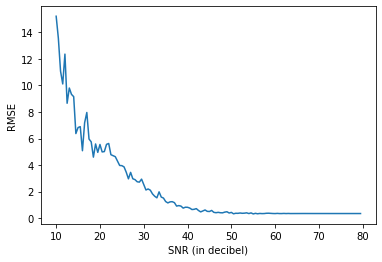

In [22]:
plt.plot(SNRs,RMSE)
plt.xlabel('SNR (in decibel)')
plt.ylabel('RMSE')

# Sinc interpolation

In [33]:
def sinc_interp(x, s, u):
    if len(x) != len(s):
        raise ValueError('x and s must be the same length')
    
    # Find the period    
    T = s[1] - s[0]
    
    sincM = np.tile(u, (len(s), 1)) - np.tile(s[:, np.newaxis], (1, len(u)))
    y = np.dot(x, np.sinc(sincM/T))
    return y

In [34]:
u = [i for i in range(1104,2497,10)]
shift = [i*0 for i in range(len(u))]

for i in range(len(u)):
    u[i] = u[i] + shift[i]
shift

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

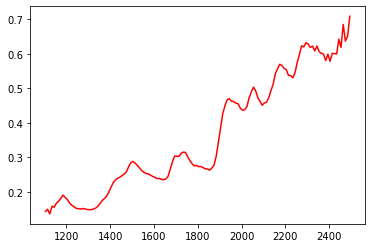

In [35]:
y_new = sinc_interp(X.iloc[0],np.array([int(i) for i in X.columns]),u)
plt.plot(u,y_new,color='red')